In [1]:
import os
from IPython.display import HTML

pathHome = os.path.expanduser('~')
HTML(filename = pathHome + '\\OneDrive\\Python\\toggleCode.html')

# Average salaries in Thailand by occupation from 2001-2016

Data from [Bank of Thailand](https://www.bot.or.th/Thai/Statistics/Pages/default.aspx):  
*EC_RL_018* for average salaries by occupation, *EC_RL_012* for number of wokers by occupation, and *EC_EI_027* for inflation.

In [2]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("whitegrid")

from datetime import datetime

In [3]:
# opening rawdata and record indicators

filepath_avgSal = 'EC_RL_018.csv'

with open(filepath_avgSal) as raw:
#     for i in raw:
#         print(i)
    rawdata = csv.reader(raw, delimiter=',')
    rawdata = list(rawdata)

source = rawdata[0][0]
dataCode = rawdata[1][0]
unit = rawdata[2][0]
updateDate = rawdata[3][0]

In [4]:
# preparing numpy arrays to create dataframe

body = np.array(rawdata[5:])
period = body[0,2:]
# categories = body[1:,1]
categories = np.array(['All average', 'Legislators, senior officials, managers', 'Professionals', 
              'Technicians, associate professionals', 'Clerks', 'Service/sales workers', 'Skilled agricultural/fishery workers',
              'Craftsmen/related trades workers', 'Plant and machine operators/assemblers',
              'Elementary occupations', 'Others'])

data = body[1:,2:].astype('float').transpose()

# print('Index size: %d' % period.shape)
# print('Columns: %d' % categories.shape)
# print('Data size: (%d, %d)' % data.shape)

In [5]:
# reformating strings for categories

# from string import digits
# import re

# for i in range(categories.shape[0]):
#     # remove digits and '.' in the strings
#     temp = categories[i].translate({ord(k): None for k in digits+'.'}).lstrip()
#     # replace repeated spaces with single space with regex
#     categories[i] = re.sub(' +', ' ', temp)


In [6]:
# creating timestamp

QtoM = {'Q1':'31-03-', 'Q2':'30-06-', 'Q3':'30-09-', 'Q4':'31-12-'}

time = np.empty(period.shape, dtype='object')

for i in range(time.shape[0]):
    mounth = QtoM[period[i][:2]]
    year = period[i][3:7]
    time[i] = mounth+year
    
time = pd.to_datetime(time, format='%d-%m-%Y')
time = time.map(lambda t: t.strftime('%Y-%b'))

## First few rows of data

The following table shows that the data was collected by quarter and separated occupations into ten categories.

* Legislators, senior officials, managers = ผู้บัญญัติกฎหมาย, ข้าราชการระดับอาวุโส, ผู้จัดการ
* Professionals = ผู้ประกอบวิชาชีพด้านต่างๆ
* Technicians, associate professionals = ช่างเทคนิคสาขาต่างๆ และวิชาชีพอื่นๆ ที่เกี่ยวข้อง
* Clerks = เสมียน	
* Service/sales workers = พนักงานบริการ/พนักงานขาย
* Skilled agricultural/fishery workers = ผู้ปฏิบัติงานที่มีฝีมือในด้านการเกษตรและการประมง
* Craftsmen/related trades workers = ผู้ปฏิบัติด้านงานฝีมือและอื่นๆ ที่เกี่ยวข้อง
* Plant and machine operators/assemblers = ผู้ปฏิบัติการเครื่องจักรโรงงานและด้านการประกอบ
* Elementary occupations = อาชีพขั้นพื้นฐาน/ผู้ใช้แรงงานด้านต่างๆ
* Others = อื่นๆ นอกเหนือจากข้างต้น

The first column is **All Average** = **เฉลี่ยรวมทุกกลุ่มอาชีพ**.


In [7]:
df = pd.DataFrame(data, index=time, columns=categories)

# get the earliest period to come first
df = df.sort_index()

df.head()

,All average,"Legislators, senior officials, managers",Professionals,"Technicians, associate professionals",Clerks,Service/sales workers,Skilled agricultural/fishery workers,Craftsmen/related trades workers,Plant and machine operators/assemblers,Elementary occupations,Others
2001-Dec,6760.99,25007.92,17130.21,11212.18,8782.69,5651.82,2538.43,4755.04,5480.45,3019.81,18932.41
2001-Jun,6626.39,22457.16,16338.63,10525.27,8785.40,5627.14,2408.48,4610.43,5310.26,3228.18,21421.54
2001-Mar,6501.65,22332.81,16655.97,10245.75,8684.23,5655.47,2901.34,4533.36,5207.83,3119.17,10469.74
2001-Sep,6763.97,24830.83,17629.49,10742.04,8837.85,5567.03,2160.87,4764.41,5247.38,3446.14,14176.03
2002-Dec,6689.32,22252.23,18473.05,10945.62,8795.00,5599.01,2741.83,4937.75,5553.20,3183.74,14607.88


## Average salaries of different jobs

Only data from quarter 4 is presented as annual data in the heatmap plot below. 

The plot show that the grop of *Legislator, senior officials, managers* consistently has the higest average salary while the groups of *Skilled agricultural/fishery workers* and *Elementary occupations* always stay at the bottom.

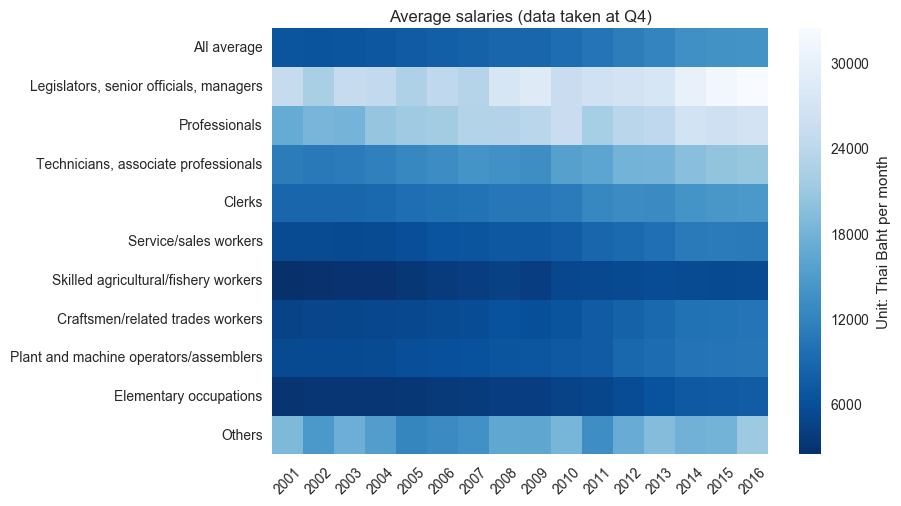

In [8]:
from matplotlib.ticker import ScalarFormatter
cbar_fmt = ScalarFormatter(useMathText=True)
cbar_fmt.set_powerlimits((-2, 5))

annual = df[::4]
# mask_value = 19999
# annual.insert(1, '', mask_value)

ax = sns.heatmap(annual.transpose(), cmap='Blues_r', cbar_kws={'label':'Unit: Thai Baht per month', 'format':cbar_fmt})
ax.set_xticklabels([annual.index[x][0:4] for x in range(annual.shape[0])], rotation=45)
ax.set_title('Average salaries (data taken at Q4)')

plt.show()

## Comparing jobs with low and high salary

The difference in salary between the groups with the lowest and highest average salaries is drastic. In the starting period of the survey data, the salary of the latter group was 10 times higher than that of the former.

Looking more closely, however, reveals that the group with low salary does better in terms of salary growth. The low salary group shows consistent increase in salary while the latter experienced some fluctation during the years.

By the end of the survay, the ratio between salaries of the groups with the higest and lowest average salary has reduced to 5 times. In terms of trend, the average salary of all groups of workers resembles that of the group with lower salary because there are more workers in these groups compared to the groups with high salary. It is a separate data set but charts showing the distribution of number of workers in different occupations in 2001 and 2016 are provided ![here](...) for a quick look.

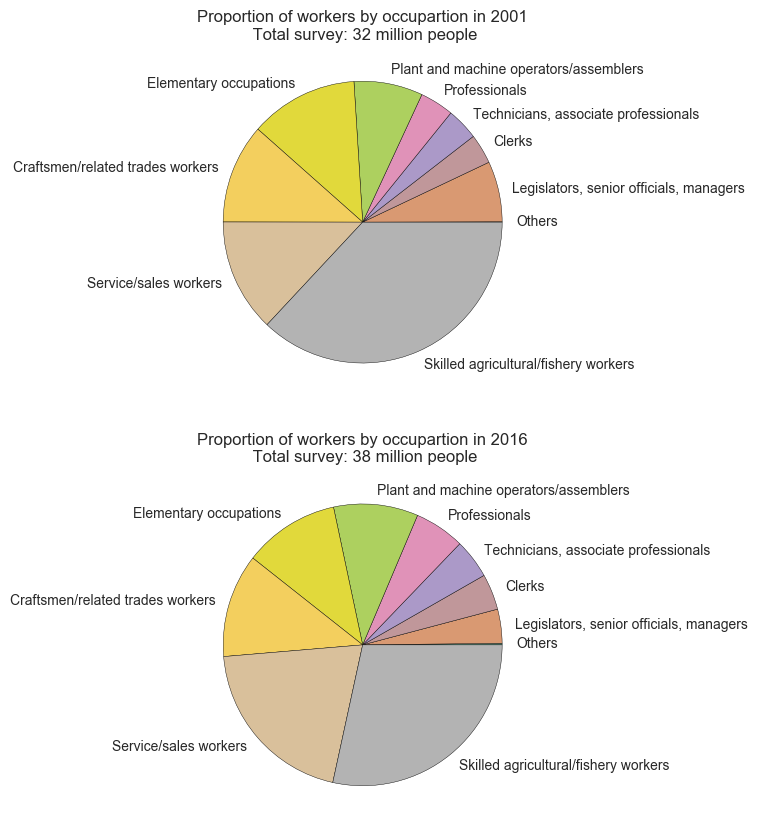

In [9]:
# Getting number of workers by occupation

filepath_workers = 'EC_RL_012.csv'

with open(filepath_workers) as raw:
#     for i in raw:
#         print(i)
    rawdata = csv.reader(raw, delimiter=',')
    rawdata = list(rawdata)

# number of workers by occupation from 2016 to 2001 (unit: thousand people)
workers_unit = rawdata[2][0]
workers = np.array(rawdata[6:])
workers = workers[:,-1:1:-1].astype('float') # reverse to sort data from 2001 to 2016 
workers = workers[:,[0,-1]]

df_workers = pd.DataFrame(workers.transpose(), index=[2001,2016], columns=categories)

df_workers_plot = df_workers.drop(['All average'], axis=1).transpose().sort_values(2016)
ax = df_workers_plot.plot.pie(y=[2001,2016], layout=(2,1), subplots=True, legend=None, figsize=(4.5,10), 
                         colormap='Set2', startangle=0)

for i in range(0,ax.shape[0]):
    ax.item(i).set_title('Proportion of workers by occupartion in ' + ax.item(i).get_ylabel() 
                         + '\n Total survey: ' + str(int(round(df_workers.iloc[i,0]/1000))) + ' million people' )
    ax.item(i).set_ylabel('')

plt.show()

In [10]:
yearStep = 3

annualBar = annual.iloc[::yearStep,[6,1,0]].sort_index()
annualBar['Year']=annualBar.index

annualBar_melt = pd.melt(annualBar, id_vars='Year', value_name='Average salary', var_name='Job type')

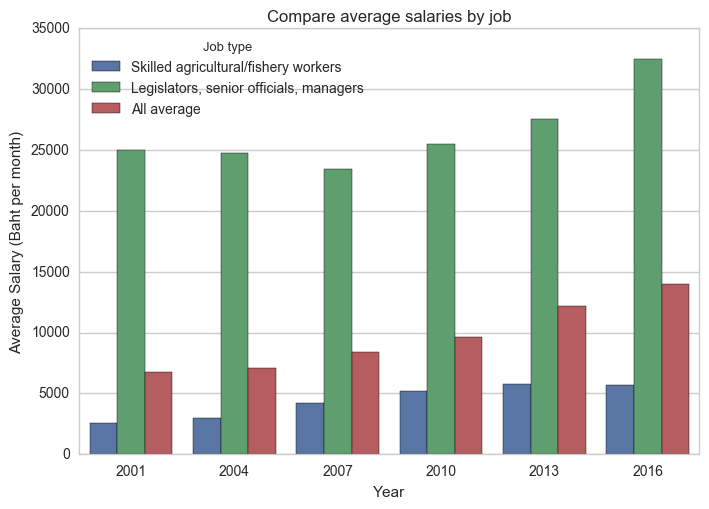

In [11]:
ax = sns.barplot(x='Year', y='Average salary' , hue='Job type', data=annualBar_melt)
ax.set_xticklabels([x for x in range(2001,2017,yearStep)], rotation=0)
ax.set_title('Compare average salaries by job')
ax.set_ylabel('Average Salary (Baht per month)')
ax.set_ylim(0, 35000)
plt.show()

In [12]:
# Getting inflation data

filepath_inflat = 'EC_EI_027.csv'

with open(filepath_inflat) as raw:
#     for i in raw:
#         print(i)
    rawdata = csv.reader(raw, delimiter=',')
    rawdata = list(rawdata)

# inflation by year from 2001 to 2016
inflation_headline = np.array(rawdata[18:19][0][18:2:-1]).astype('float')
inflation_core = np.array(rawdata[20:21][0][18:2:-1]).astype('float')

# reflected money value from 2001 to 2017 (value(2001) = 1)
accValue_infHead = np.insert(np.multiply.accumulate(inflation_headline/100+1),0,1)
accValue_infCore = np.insert(np.multiply.accumulate(inflation_core/100+1),0,1)

## Salary growth

From the previous observation, it is interesting to see how the growth rates of salary of workers in different occupations perform comparing to the country's inflation rate (headline inflation).

The heatmap plot below shows that the *Others* group acutally suffers the most regarding fluctuation of salary growth. The *Legislator, senior officials, managers* group with the highest salary comes in as the second that suffer from this fluctuation. The growth rate of salary of each groups decreases with average salary and follows the trend of inflation.

This makes sense as most of workers in the workforce are in the groups with low average salary and their collective spending contributes more toward the country's economy compared to people in the groups with high salary.

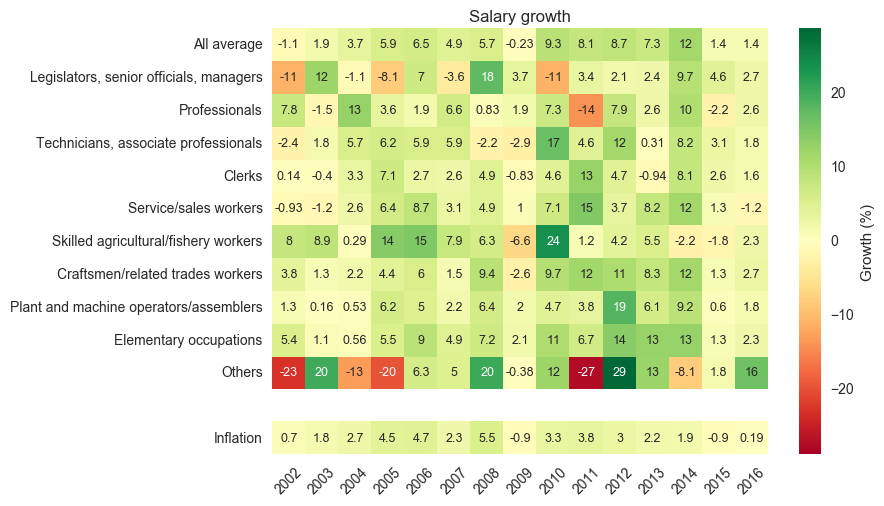

In [13]:
# calculate annual growth in %
growth = annual.pct_change()[1:]*100
growth[''] = 0
growth['Inflation'] = inflation_headline[1:] # from 2002

ax = sns.heatmap(growth.transpose(), cmap='RdYlGn', annot=True, annot_kws={'fontsize':'9'}, 
                 fmt='.2g', cbar_kws={'label':'Growth (%)'}, mask=growth.transpose()==0)
ax.set_xticklabels([growth.index[x][0:4] for x in range(growth.shape[0])], rotation=45)
ax.set_title('Salary growth')

plt.show()

## Salary growth rate for jobs with low and high salary

In [14]:
yearStep = 2

growthBar = growth.iloc[::yearStep,[6,1,0]].sort_index()
growthBar['Year']=growthBar.index

growthBar_melt = pd.melt(growthBar, id_vars='Year', value_name='Growth rate (%)', var_name='Job type')

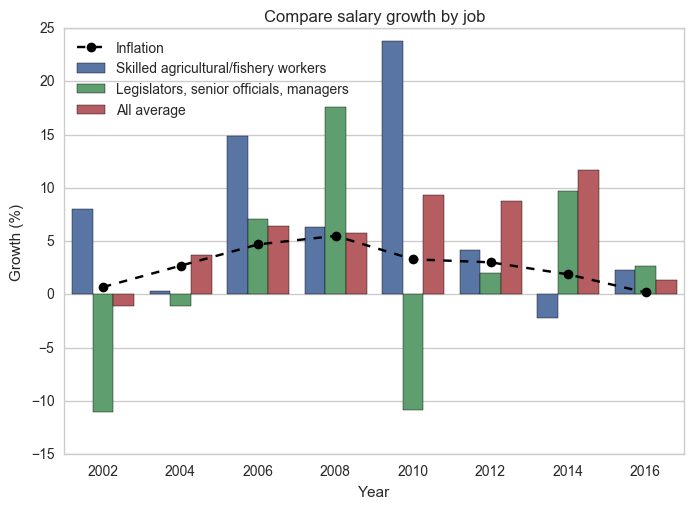

In [15]:
ax = growth['Inflation'][::yearStep].sort_index().plot(linestyle='--', marker='o', color='k')

sns.barplot(x='Year', y='Growth rate (%)' , hue='Job type', data=growthBar_melt, ax=ax)
ax.set_xticklabels([x for x in range(2002,2017,yearStep)], rotation=0)
ax.set_title('Compare salary growth by job')
ax.set_ylabel('Growth (%)')
ax.legend(loc=2)
plt.show()

## Spending power (normalized to itself in 2001 and accumulated inflation)

One way to see how individual workers experience the value of their income is to look at changes in normalized spending power. In this case the spending power for each category is defined as follows.

$$ Power(Year) = \dfrac{Income(Year)}{Income(2001) \times Acc_{inflat}(Year)} $$

where $Acc_{inflat}(Year)$ is monetary value change due to accumulated inflation since 2001 (i.e. this term equals 1 in 2001).

This factor can be calcualted using the expression below.

$$ Acc_{inflat}(Year) = \prod\limits_{y=2001}^{Year} \big(1+Inflation(y)\big) $$

where $Inflation(y)$ is the value of inflation in a specific year.

By looking at this number, one can quickly identifies that a certain group of workers in year **X** will be able to have the same, better, or worse living conditions compared to theirs in 2001 when $Power(X)$ is equal to, greater, or smaller than 1.

A heatmap of spending powers for different occupations is shown below.

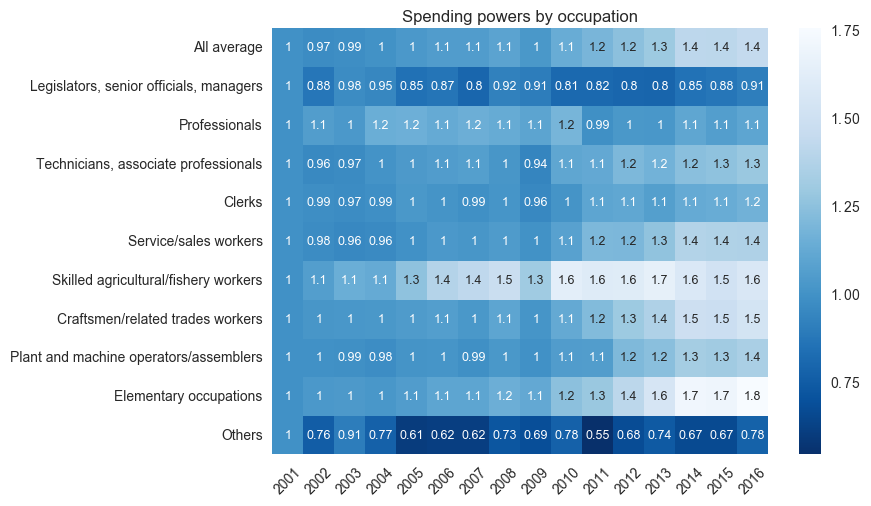

In [16]:
ref = annual.iloc[0]

# divide by itself in 2001
power_2001 = annual.divide(ref, axis=1)
# divide by accumulated inflation (2001-2016)
power_2001 = power_2001.divide(accValue_infHead[:-1], axis=0)

ax = sns.heatmap(power_2001.transpose(), cmap='Blues_r', annot=True, fmt='.2g', annot_kws={'fontsize':'9'}, 
                 cbar_kws={'label':'', 'format':cbar_fmt})
ax.set_xticklabels([power_2001.index[x][0:4] for x in range(power_2001.shape[0])], rotation=45)
ax.set_title('Spending powers by occupation')

plt.show()

## Comparing spending power

The spending power heatmap shows that workers in most occupations have increased spending power compare to theirs in 2001. Interestingly the data reveals that groups of workers with high salary experiences less increase or even decrease spending power over time.

The two groups that see reduction in their spending over this period are *Ligislator, seniors, managers* and *Others*. Theses two are groups with the highest and the third highest average salary.

The groups that see the highest and the second highest increase in their spending power are *Elementary occupations* and *Skilled agricultural/fishery workers*, respectively. They are the groups with the second lowest and the lowest average salary of this 16-year period dataset.

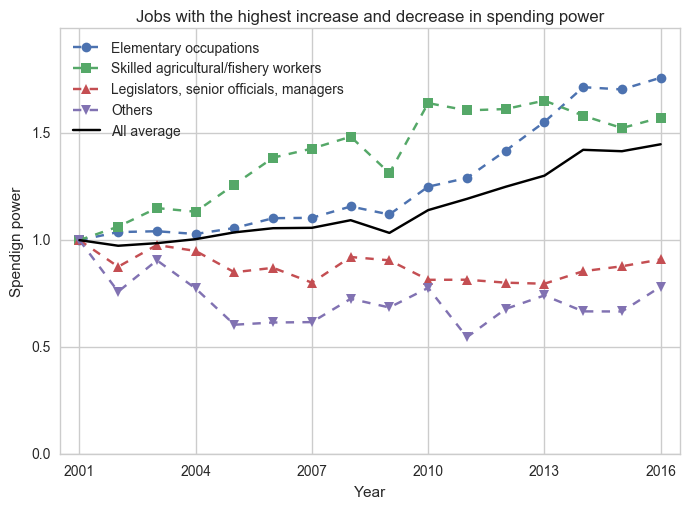

In [17]:
ax = power_2001.iloc[:,[-2,6,1,-1,0]].plot(title='Jobs with the highest increase and decrease in spending power', 
                                           style=['--o','--s','--^','--v','-k'])
ax.set_xlabel('Year')
ax.set_xlim(-0.5,15.5)
ax.set_xticks([x for x in range(0,17,3)])
ax.set_xticklabels([x for x in range(2001,2017,3)], rotation=0)

ax.set_ylabel('Spendign power')
ax.set_ylim(0,1.99)
ax.set_yticks([0.5*x for x in range(0,4)])
ax.legend(loc=2)

# ax.xaxis.grid(False)

plt.show()

## Summary and discussions

From the data, it can be seen that average salaries of workers in Thailand in all occupations have increased over the past 16 years. The growth rates, however, differ from occupation to occupation where occupations with high average salary experience pronounced fluctuation in growth rates. When taking into account the inflation rate, workers in the groups with low average salary see consistent increase in their spending power over the length of the dataset. This increase is smaller for groups with higher average salary, and two of them see their spending power decrease. 


### Choosing a job?

Based on the observed trend, a compromise between growth or income is inevitable. Note that the data represents **'average'** salaries. Top people in all categories definitely earn much higher. 

### Business targets

Business that targets people with high salary might have to consider adjusting their long term strategies to focus more on workers in groups with lower average salary because they are likely to spend more. In addition, changes in distribution of workers in 2001 and 2016 do not reflect significant shift in percentage of people working in jobs with high and low average salary (although there is significant reduction/increase of people in *Skilled agriculture/fishery workers* and *Service/sales workers*, respectively); this means they will continue to be the majority for quite sometime

## Closing notes

The data and discussions above do not present the state of economy of Thailand as a whole. For that, additional indicators have to be analyzed such as an inflation rate (lower than 2% since 2014, and negative in 2015) and an unemployment rate.

## Salary of job compared to itself in 2001

In [18]:
ref = annual.iloc[0]
annual_2001 = annual.divide(ref, axis=1)[1:]

annual_2001[' '] = 1.01
changeMoney_2001 = accValue_infHead[1:-1]
changeMoney_2001
annual_2001['Change in monetary value due to inflation'] = changeMoney_2001

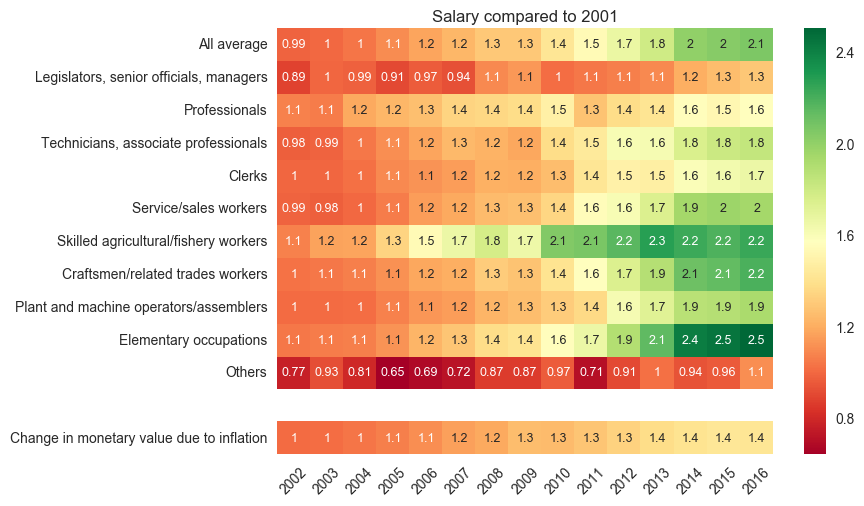

In [19]:
ax = sns.heatmap(annual_2001.transpose(), cmap='RdYlGn', annot=True, annot_kws={'fontsize':'9'}, 
                 fmt='.2g', cbar_kws={'label':''}, mask=annual_2001.transpose()==1.01)
ax.set_xticklabels([annual_2001.index[x][0:4] for x in range(annual_2001.shape[0])], rotation=45)
ax.set_title('Salary compared to 2001')

plt.show()

## Salary of job compared to itself in 2001 for jobs with low and high salary

In [20]:
yearStep = 2

annual_2001_bar = annual_2001.iloc[::yearStep,[6,1,0]].sort_index()
annual_2001_bar['Year']=annual_2001_bar.index

annual_2001_bar_melt = pd.melt(annual_2001_bar, id_vars='Year', value_name='Salary compared to 2001', var_name='Job type')

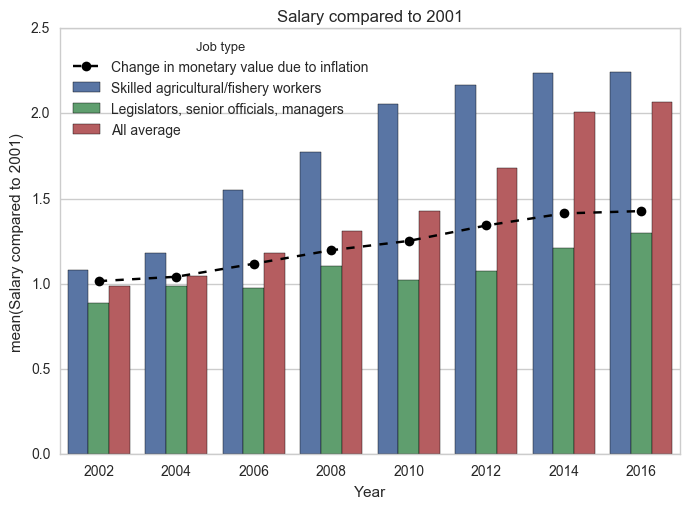

In [21]:
ax = annual_2001['Change in monetary value due to inflation'][::yearStep].sort_index().plot(linestyle='--', marker='o', color='k')

ax = sns.barplot(x='Year', y='Salary compared to 2001' , hue='Job type', data=annual_2001_bar_melt)
ax.set_xticklabels([x for x in range(2002,2017,yearStep)], rotation=0)
ax.set_title('Salary compared to 2001')

plt.show()